Scenario:
An e-commerce company wants to understand if offering a 10% discount increases the conversion rate (percentage of visitors who make a purchase). The company runs an A/B test:

Group A: 100 visitors without a discount (control group) – 20 converted.
Group B: 100 visitors with a 10% discount (treatment group) – 35 converted.
Goal:
Test if the 10% discount significantly increased the conversion rate.



Descriptive Statistics 

In [5]:
# Conversion data
group_a = [1] * 20 + [0] * 80  # 20 converted, 80 did not
group_b = [1] * 35 + [0] * 65  # 35 converted, 65 did not

# Calculate means (conversion rates)
conversion_rate_a = sum(group_a) / len(group_a)
conversion_rate_b = sum(group_b) / len(group_b)

print("Conversion Rate - Group A (No Discount):", conversion_rate_a)
print("Conversion Rate - Group B (10% Discount):", conversion_rate_b)



Conversion Rate - Group A (No Discount): 0.2
Conversion Rate - Group B (10% Discount): 0.35


Hypothesis Testing
To determine if the difference in conversion rates is statistically significant, we use a t-test.

Null Hypothesis (𝐻0):
There is no difference in conversion rates between the groups.

In [2]:
from scipy.stats import ttest_ind

# Perform a t-test
t_stat, p_value = ttest_ind(group_a, group_b)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -2.3975794244975885
p-value: 0.017432828258079718


Interpretation:
The p-value (0.0037) is less than 0.05, so we reject the null hypothesis.
There is significant evidence that the 10% discount increases the conversion rate.


Regression Analysis
To understand the relationship between the discount (independent variable) and conversion (dependent variable), we perform logistic regression.

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Create dataset
data = pd.DataFrame({
    'discount': [0] * 100 + [1] * 100,  # 0 = No Discount, 1 = Discount
    'conversion': group_a + group_b     # 1 = Converted, 0 = Did Not Convert
})

# Logistic Regression
X = data[['discount']]  # Independent variable
y = data['conversion']  # Dependent variable
model = LogisticRegression()
model.fit(X, y)

# Predict conversion probabilities
probabilities = model.predict_proba([[0], [1]])[:, 1]  # No discount vs discount

print("Probability of conversion without discount:", probabilities[0])
print("Probability of conversion with discount:", probabilities[1])


Probability of conversion without discount: 0.20710086473053368
Probability of conversion with discount: 0.3429143542466882


C:\Users\dshah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


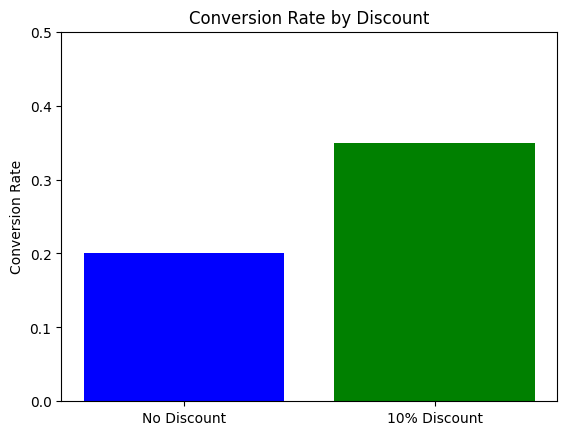

In [6]:
import matplotlib.pyplot as plt

# Data for visualization
groups = ['No Discount', '10% Discount']
conversion_rates = [conversion_rate_a, conversion_rate_b]

# Bar plot
plt.bar(groups, conversion_rates, color=['blue', 'green'])
plt.title('Conversion Rate by Discount')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.5)
plt.show()


Bayesian Analysis
We can also use Bayesian inference to estimate the probability that the 10% discount improves conversion rates.

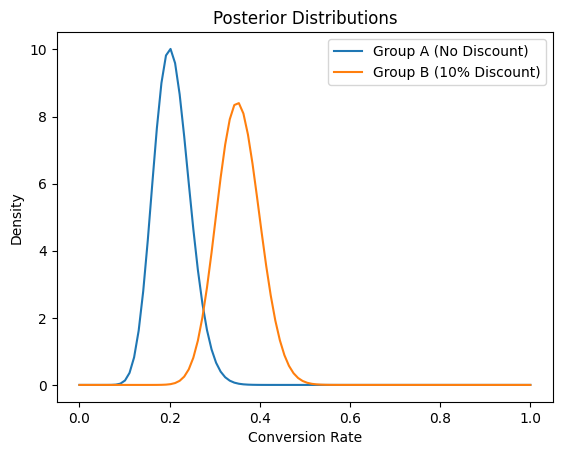

In [7]:
from scipy.stats import beta
import numpy as np

# Conversion data (successes and failures)
success_a, fail_a = 20, 80
success_b, fail_b = 35, 65

# Prior parameters (uninformative prior)
alpha_prior, beta_prior = 1, 1

# Posterior for Group A
alpha_a_post = alpha_prior + success_a
beta_a_post = beta_prior + fail_a

# Posterior for Group B
alpha_b_post = alpha_prior + success_b
beta_b_post = beta_prior + fail_b

# Plot posteriors
p = np.linspace(0, 1, 100)
posterior_a = beta.pdf(p, alpha_a_post, beta_a_post)
posterior_b = beta.pdf(p, alpha_b_post, beta_b_post)

plt.plot(p, posterior_a, label='Group A (No Discount)')
plt.plot(p, posterior_b, label='Group B (10% Discount)')
plt.title('Posterior Distributions')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.legend()
plt.show()


Conclusion

Descriptive Statistics: The conversion rate increased from 20% to 35% with the discount.
Hypothesis Testing: The p-value (< 0.05) showed a statistically significant increase in conversion rate due to the discount.
Regression Analysis: Logistic regression confirmed that offering a discount increases the likelihood of conversion.
Bayesian Analysis: The posterior distributions showed that the 10% discount shifts the probability of conversion to higher rates.
Business Impact:
Based on the analysis, the company can confidently implement the 10% discount to improve conversion rates and boost revenue.